<a href="https://colab.research.google.com/github/na2027/CE888/blob/main/bootstrap(lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('/content/customer.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [7]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_avg(sample, sample_size, n_bootstraps):
  samples = np.zeros((n_bootstraps, sample_size))
  for i in range(n_bootstraps):
    samples[i, :] = np.random.choice(sample, (sample_size), replace=True)
  data_mean = np.mean(samples)
  samples_avg = np.mean(samples, axis=1)
  lower_bound = np.percentile(samples_avg, 2.5)
  upper_bound = np.percentile(samples_avg, 97.5)
  return data_mean, lower_bound, upper_bound

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 30000.0)

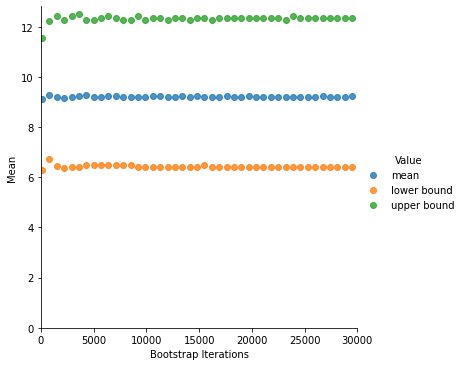

In [11]:
# Call your bootstrap function and plot the results

boots_lst = []
for i in range(100, 30000, 700):
    boot = bootstrap_avg(data, data.shape[0], i)
    boots_lst.append([i, boot[0], "mean"])
    boots_lst.append([i, boot[1], "lower bound"])
    boots_lst.append([i, boot[2], "upper bound"])

df_boot = pd.DataFrame(boots_lst, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 30000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [16]:
def bootstrap_avg_ci(sample, sample_size, n_bootstraps, ci):
  samples = np.zeros((n_bootstraps, sample_size))
  for i in range(n_bootstraps):
    samples[i, :] = np.random.choice(sample, (sample_size), replace=True)
  data_mean = np.mean(samples)
  shift = (100 - ci) / 2.0
  samples_means = np.mean(samples, axis=1)
  lower_bound = np.percentile(samples_means, shift)
  upper_bound = np.percentile(samples_means, 100 - shift)
  return data_mean, lower_bound, upper_bound

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 30000.0)

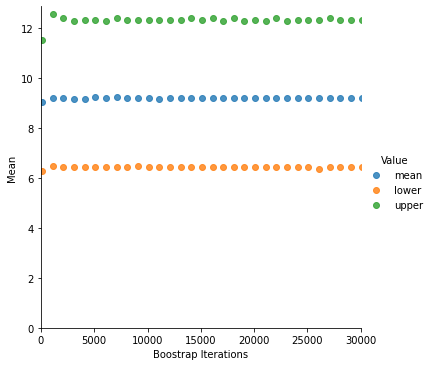

In [18]:
boots_lst = []
for i in range(100, 30000, 700):
    boot = bootstrap_avg_ci(data, data.shape[0], i, 80)
    boots_lst.append([i, boot[0], "mean"])
    boots_lst.append([i, boot[1], "lower bound"])
    boots_lst.append([i, boot[2], "upper bound"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 30000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [28]:
df_vehicle = pd.read_csv('/content/vehicle.csv')
df_vehicle.head()
current_fleet = df_vehicle['Current fleet']
new_fleet = df_vehicle['New Fleet']
new_fleet = new_fleet[~np.isnan(new_fleet)]

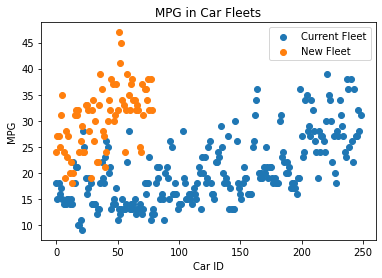

In [29]:
import matplotlib.pyplot as plt
plt.scatter(range(len(current_fleet)), current_fleet, label='Current Fleet')
plt.scatter(range(len(new_fleet)), new_fleet, label='New Fleet')
plt.xlabel('Car ID')
plt.ylabel('MPG')
plt.title('MPG in Car Fleets')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Current Fleat')

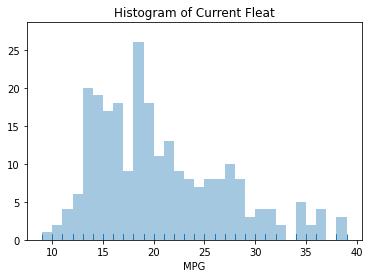

In [30]:
sns.distplot(current_fleet, bins=30, kde=False, rug=True, axlabel='MPG').set_title('Histogram of Current Fleat')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of New Fleat')

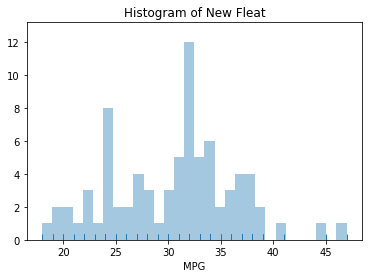

In [31]:
sns.distplot(new_fleet, bins=30, kde=False, rug=True, axlabel='MPG').set_title('Histogram of New Fleat')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [36]:
mean_current, lower_current_fleet, upper_current_fleet = bootstrap_avg_ci(current_fleet, current_fleet.shape[0], 10000, 95)
mean_new, lower_new_fleet, upper_new_fleet = bootstrap_avg_ci(new_fleet, new_fleet.shape[0], 10000, 95)

In [37]:
print('Current Fleat:')
print('  Mean:', mean_current)
print('  Lower Mean (95% CI):', lower_current_fleet)
print('  Upper Mean (95% CI):', upper_current_fleet)
print()
print('New Fleat:')
print('  Mean:', mean_new)
print('  Lower Mean (95% CI):', lower_new_fleet)
print('  Upper Mean (95% CI):', upper_new_fleet)


Current Fleat:
  Mean: 20.152920883534136
  Lower Mean (95% CI): 19.36144578313253
  Upper Mean (95% CI): 20.955823293172692

New Fleat:
  Mean: 30.482843037974682
  Lower Mean (95% CI): 29.164556962025316
  Upper Mean (95% CI): 31.835443037974684


In [38]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
   
def permutation_test_avg(X, Y, n_permutations):
  concat = np.concatenate((X, Y))
  Xsize = len(X)
  meanX = np.mean(X)
  meanY = np.mean(Y)
  meanDiffObs = meanY - meanX
  count = 0
  for i in range(n_permutations):
    perm = np.random.permutation(concat)
    permX = perm[:Xsize]
    permY = perm[Xsize:]
    meanPermX = np.mean(permX)
    meanPermY = np.mean(permY)
    if meanPermY - meanPermX > meanDiffObs:
      count = count + 1
  return count / n_permutations
    

Text(0.5, 1.0, 'Changes in P-Value According to Permutations Used')

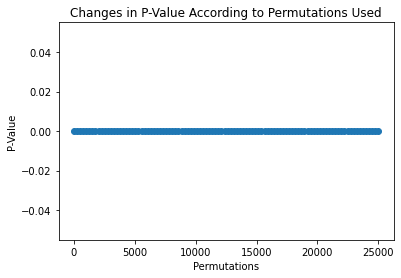

In [39]:
iterations = np.linspace(1, 25000, 100, dtype=np.int32)
p_values = []
for i in iterations:
  p_values.append(permutation_test_avg(current_fleet, new_fleet, i))

plt.scatter(iterations, p_values)
plt.xlabel('Permutations')
plt.ylabel('P-Value')
plt.title('Changes in P-Value According to Permutations Used')



In [40]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

import pandas as pd


In [41]:
df_PA = pd.DataFrame(dem_share_PA)


In [42]:
df_PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       67 non-null     float64
dtypes: float64(1)
memory usage: 664.0 bytes


In [43]:
df_OH = pd.DataFrame(dem_share_OH)

In [44]:
df_OH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       88 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes
